In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("C:\\Users\\Prashant Singh\\OneDrive\\Documents\\Internships\\Prodigy Infotech\\US_Accidents_March23.csv")
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [26]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [27]:
 missing_values= df.isnull().sum().sort_values(ascending=False)
 percentage_of_missing_values=(missing_values /len(df))*100
print( pd.concat([missing_values,percentage_of_missing_values],axis=1
 , keys=['missingvalues', 'percentageofmissingvalues']))


                       missingvalues  percentageofmissingvalues
End_Lng                      3402762                  44.029355
End_Lat                      3402762                  44.029355
Precipitation(in)            2203586                  28.512858
Wind_Chill(F)                1999019                  25.865904
Wind_Speed(mph)               571233                   7.391355
Visibility(mi)                177098                   2.291524
Wind_Direction                175206                   2.267043
Humidity(%)                   174144                   2.253301
Weather_Condition             173459                   2.244438
Temperature(F)                163853                   2.120143
Pressure(in)                  140679                   1.820288
Weather_Timestamp             120228                   1.555666
Sunrise_Sunset                 23246                   0.300787
Civil_Twilight                 23246                   0.300787
Astronomical_Twilight          23246    

In [28]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

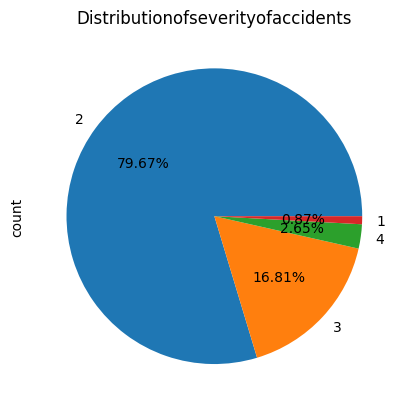

In [29]:
 df['Severity'].value_counts().plot(kind ='pie' ,autopct='%0.2f%%')
 plt.title('Distributionofseverityofaccidents')
 plt.show()

In [30]:
df['City'].value_counts()

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Rapid River           1
Cat Spring            1
Glenwood City         1
Downing               1
Marfa                 1
Name: count, Length: 13678, dtype: int64

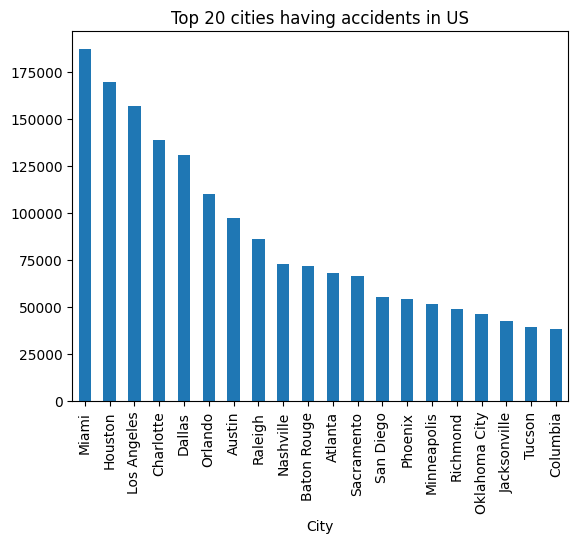

In [31]:
 df['City'].value_counts()[0:20].plot(kind = 'bar')
 plt.title('Top 20 cities having accidents in US')
 plt.show()

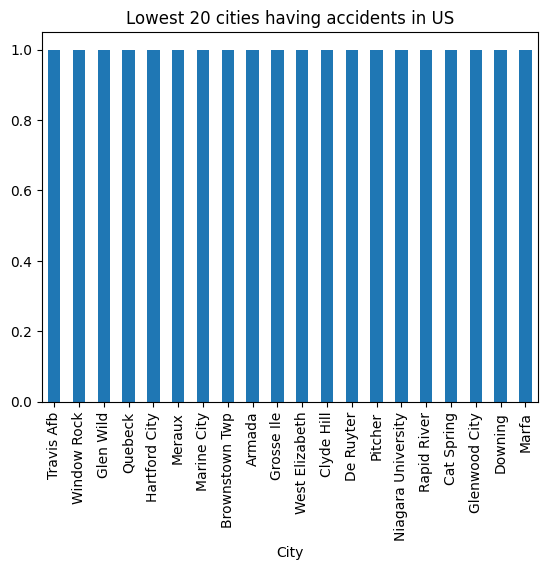

In [32]:
df['City'].value_counts()[-20:].plot(kind = 'bar')
plt.title('Lowest 20 cities having accidents in US')
plt.show()

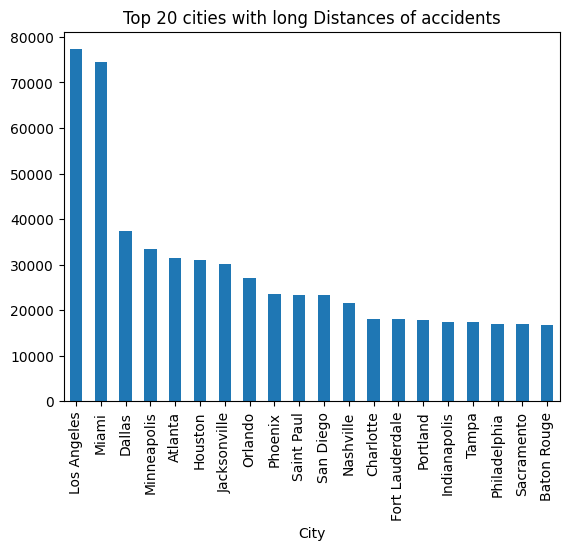

In [33]:
data = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False)[0:20]
data.plot(kind='bar')
plt.title('Top 20 cities with long Distances of accidents')
plt.show()

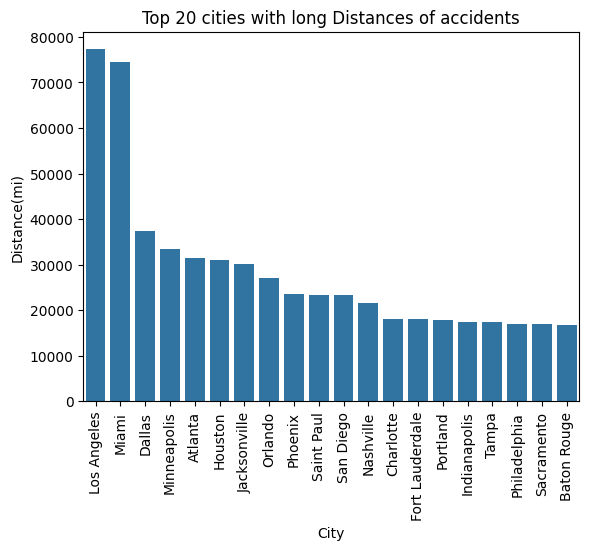

In [34]:
 dt = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False).reset_index()[0:20]
 sns.barplot(x='City' , y= 'Distance(mi)' , data = dt)
 plt.title('Top 20 cities with long Distances of accidents')
 plt.xticks(rotation = 90)
 plt.show()

C:\Users\Prashant Singh\AppData\Local\Temp\ipykernel_8564\2080670926.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt)


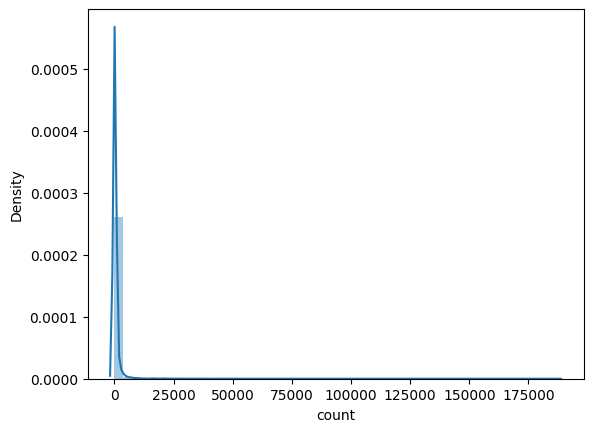

In [35]:
 import seaborn as sns
dt = df['City'].value_counts()
sns.distplot(dt)
plt.show()

C:\Users\Prashant Singh\AppData\Local\Temp\ipykernel_8564\1714518570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt)


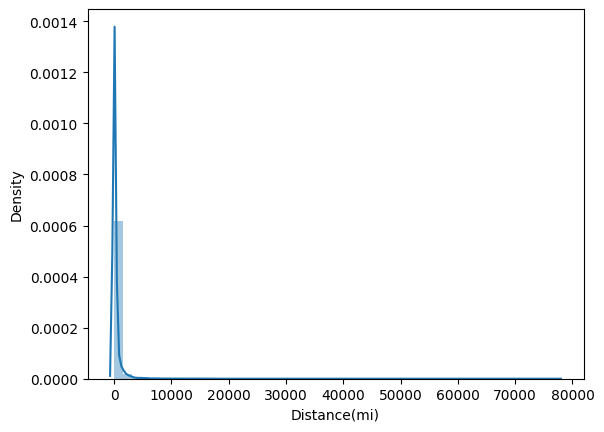

In [37]:
dt = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False)
sns.distplot(dt)
plt.show()

In [41]:
df['Start_Time']

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [42]:
df['Start_Time'].dtypes

dtype('O')

In [44]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Time'].dtypes

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 3639775. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

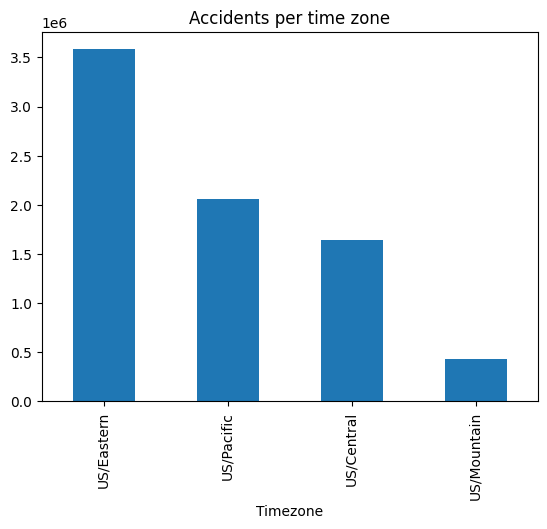

In [46]:
df['Timezone'].value_counts().plot(kind='bar')
plt.title('Accidents per time zone')
plt.show()

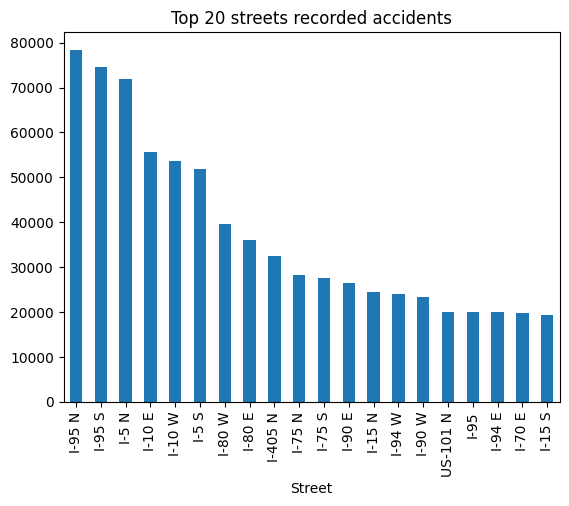

In [47]:
streets = df['Street'].value_counts()[0:20]
streets.plot(kind = 'bar')
plt.title('Top 20 streets recorded accidents')
plt.show()

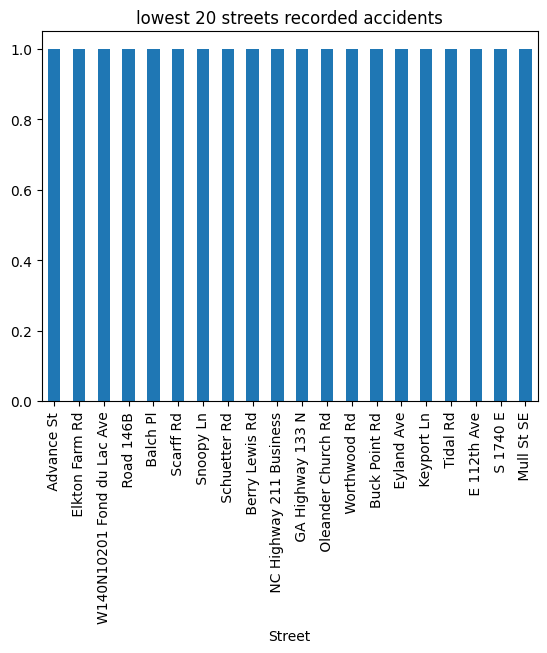

In [48]:
streets = df['Street'].value_counts()[-20:]
streets.plot(kind = 'bar')
plt.title('lowest 20 streets recorded accidents')
plt.show()

In [49]:
df['Temperature(F)'].value_counts().head(5)

Temperature(F)
77.0    170991
73.0    170898
68.0    163767
72.0    160498
75.0    158448
Name: count, dtype: int64

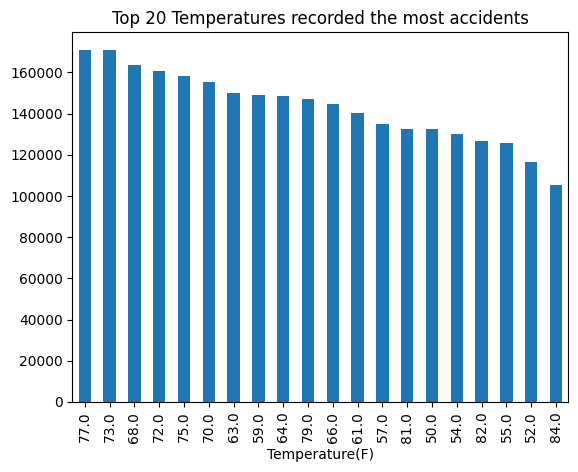

In [50]:
df['Temperature(F)'].value_counts().head(20).plot(kind = 'bar')
plt.title('Top 20 Temperatures recorded the most accidents')
plt.show()

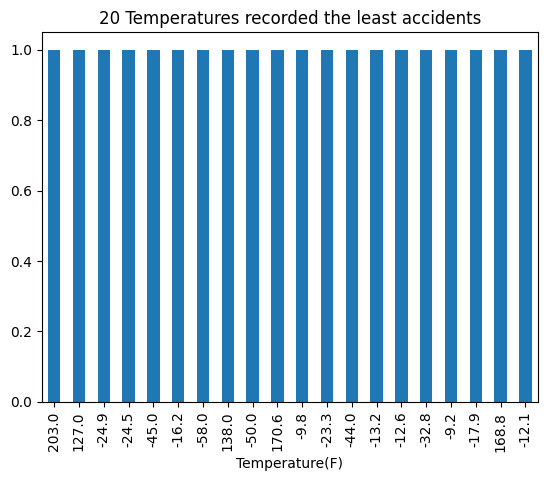

In [51]:
df['Temperature(F)'].value_counts().tail(20).plot(kind = 'bar')
plt.title('20 Temperatures recorded the least accidents')
plt.show()

C:\Users\Prashant Singh\AppData\Local\Temp\ipykernel_8564\2605155905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature(F)'])


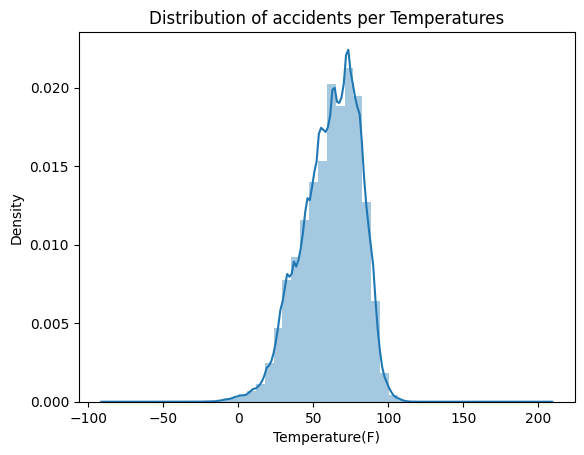

In [52]:
sns.distplot(df['Temperature(F)'])
plt.title('Distribution of accidents per Temperatures')
plt.show()

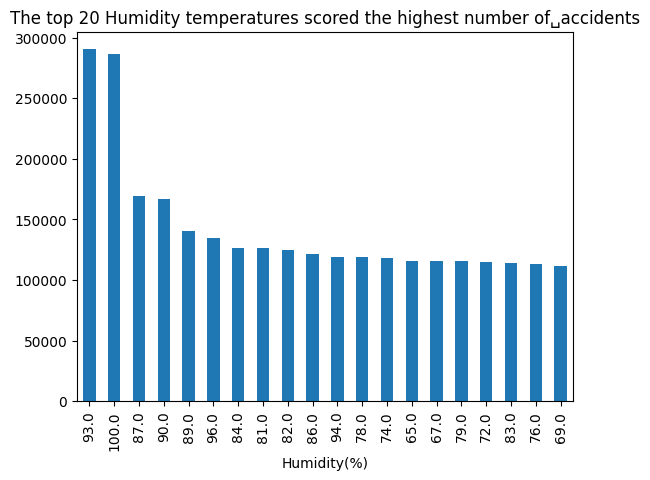

In [53]:
df['Humidity(%)'].value_counts().head(20).plot(kind='bar')
plt.title('The top 20 Humidity temperatures scored the highest number of␣accidents')
plt.show()

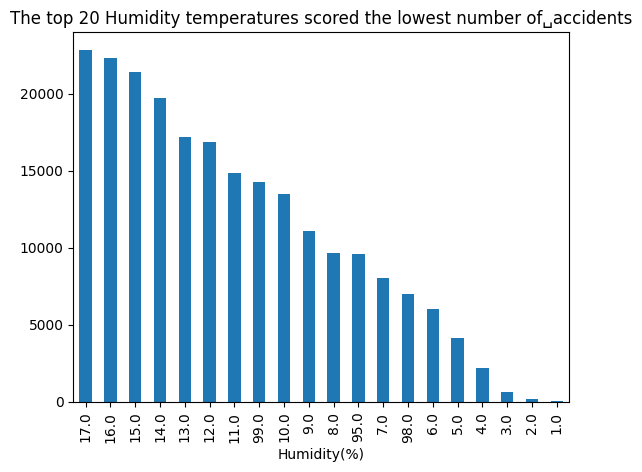

In [54]:
df['Humidity(%)'].value_counts().tail(20).plot(kind='bar')
plt.title('The top 20 Humidity temperatures scored the lowest number of␣accidents')
plt.show()

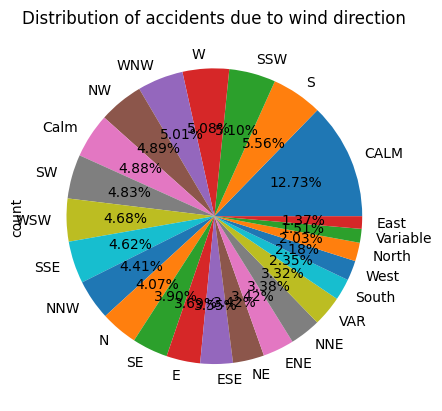

In [55]:
 df['Wind_Direction'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
 plt.title('Distribution of accidents due to wind direction')
 plt.show()

In [57]:
temp = df.groupby('Timezone')['Temperature(F)'].mean()
temp

Timezone
US/Central     60.730387
US/Eastern     62.146114
US/Mountain    58.497216
US/Pacific     62.229420
Name: Temperature(F), dtype: float64

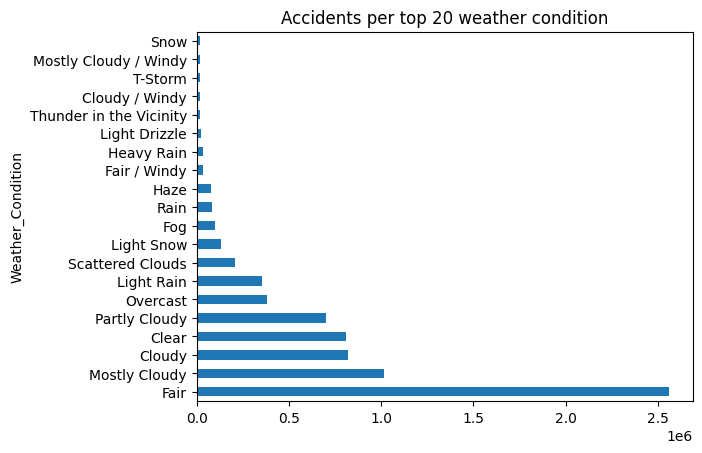

In [58]:
df['Weather_Condition'].value_counts()[0:20].plot(kind = 'barh')
plt.title('Accidents per top 20 weather condition')
plt.show()

In [60]:
df['Weather_Condition'].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [62]:
df['Weather_Condition'].value_counts()[df['Weather_Condition'].value_counts() >10000]

Weather_Condition
Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Thunder                      14202
Light Rain with Thunder      13597
Smoke                        12668
Wintry Mix                   11703
Partly Cloudy / Windy        10241
Name: count, dtype: int64

In [64]:
high_perc = df['Weather_Condition'].value_counts()[df['Weather_Condition'].value_counts() > 10000]
high_perc

Weather_Condition
Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Thunder                      14202
Light Rain with Thunder      13597
Smoke                        12668
Wintry Mix                   11703
Partly Cloudy / Windy        10241
Name: count, dtype: int64

In [65]:
len(high_perc)

25

In [66]:
print((len(high_perc) / len(df['Weather_Condition'].value_counts()))*100)

17.36111111111111


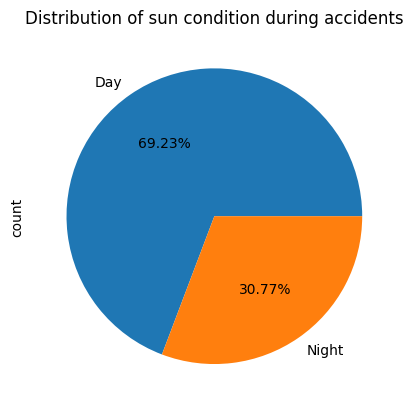

In [67]:
df['Sunrise_Sunset'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
plt.title('Distribution of sun condition during accidents')
plt.show()

In [68]:
a = df['City'].value_counts()[df['City'].value_counts() > 1000]
b = df['City'].value_counts()
print((len(a)/len(b))*100)

8.882877613686212
